# Supervised Learning

![](https://s-media-cache-ak0.pinimg.com/564x/fe/aa/1a/feaa1a16a315823b2d9ad24da7eccdaf.jpg)

In [3]:
# %load utils/imports.py

import numpy as np
import pandas as pd

from utils import *
from utils.plotting import *

from utils.styles import *

from IPython.display import IFrame

In [4]:
# Seaborn Settings for colors
import matplotlib as mpl
%matplotlib inline
sns.set(color_codes=True)
sns.set(font_scale=1.8)

# Matplotlib setting for Fonts
label_size = 17
mpl.rc('xtick', labelsize=label_size)
mpl.rc('ytick', labelsize=label_size)
font = {'family' : 'Cooper Hewit Light',
        'weight' : 'light',
        'size'   : label_size}
mpl.rc('font', **font)
# Matplotlib setting for Figure Size
mpl.rc("figure", figsize=(28, 8))
# Fixing the Random Seed
np.random.seed(0)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def lin_reg(X_train, y_train, X_test, y_test, graph=True, normalize=False):
    regr = LinearRegression(normalize=normalize)
    regr.fit(X_train, y_train)
    predictions = regr.predict(X_test)

    
    if graph:
        # Graphing with Plotly via Cufflinks
        df = pd.concat([X_test, y_test],axis=1,)
        df.columns = ['X','y']
        df.set_index('y').iplot(
            mode="markers",
            title="Estimation with LinearRegression",
            bestfit=True,
            colors=['#F7CD94'],
            bestfit_colors=['#F794AA'],
            error_type='data')
    
    mse = mean_squared_error(y_test, predictions)
    print('Mean Squared Error: {:.2}'.format(mse))
    print('Root Mean Squared Error: {:.2}'.format(np.sqrt(mse)))
    print('Variance Score: {:.2}'.format(regr.score(X_test, y_test)))
    print('Coefficients:', regr.coef_)
    
    return regr

X_train = pd.DataFrame([10, 20, 30])
y_train = pd.DataFrame([10, 20, 30])
X_test = pd.DataFrame([15, 25, 35])
y_test = pd.DataFrame([15, 25, 35])

model = lin_reg(X_train, y_train, X_test, y_test)

/home/io/.tools/anaconda/envs/vdl/lib/python3.5/site-packages/cufflinks/plotlytools.py:164: FutureWarning:

The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html



Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Variance Score: 1.0
Coefficients: [[ 1.]]


# Mass Transit Usage

Now let's switch to using a more realistic dataset. The dataset we will use summarizes the usage of mass tranist in a city. It provides details about the city's population, weekly cost to ride, weekly cost to park a car, and monthly income of the riders. Our goal is to predict the number of people in a city that will ride per week, our target, based on the other features provided.

Let's load up the dataset and have a quick look at it first to determine if there is anything we might want to clean up before we start analyzing the data.

In [9]:
fn = 'transit_demand.csv'
download_data(fn)
transit = pd.read_csv('data/' + fn)
grid(transit)

### Analysis

The first thing to notice here is that we have a feature called `city` that seems to simply be an index of which city the data came from. This really doesn't provide any information to help us with making predictions about how many people will ride per week, so it is probably safe to drop this feature.

Another point of interest is that a lot of the data has a very different scale. Now, this won't affect a linear regression, but it will affect your ability to compare these items on a graph. When graphing it is often useful to do some additional normalization of the data so that we can better understand how variables relate. The `monthly income`, `city population`, and `weekly riders` are much larger numbers when compared with the `weekly price` and `average parking rates`. Therefore, for graphing purposes we can normalize these values by dividing by some constant across the entire feature.

Let's divide `monthly_income` by $1000$ to get `monthly_income_per_k`, `weekly_riders` by $10,000$ to get `weekly_riders_per_10k`, and `city_pop` by $100k$ to get `city_pop_per_100k`. In order to keep the graph simple, we will drop `city_pop_per_100k` while graphing.

In order to make it more clear how these values are related to weekly riders, we can round the `weekly_riders_per_10k` to the closest whole number. Keep in mind we only want to do this for graphing because otherwise we are losing information.

Now we can do a pair plot to identify features that might be related.

In [11]:
# Data Cleaning
transit_norm = transit.copy()
transit_norm['weekly_riders_per_10k'] = transit_norm.weekly_riders / 10000
transit_norm['monthly_income_per_k'] = transit_norm.monthly_income / 1000
transit_norm['city_pop_per_100k'] = transit_norm.city_pop / 100000

transit_norm = transit_norm.drop(['city', 'weekly_riders', 'monthly_income', 'city_pop'], axis=1)

transit_graph = transit_norm.drop(['city_pop_per_100k'], axis=1)
transit_graph.weekly_riders_per_10k = transit_graph.weekly_riders_per_10k.round()

#### Pair Plot in Plotly

In [12]:
from plotly.tools import FigureFactory as FF
iplot(FF.create_scatterplotmatrix(transit_graph,width=1200, size=10, height=1200, diag='box'));

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]  
[ (2,1) x5,y5 ]    [ (2,2) x6,y6 ]    [ (2,3) x7,y7 ]    [ (2,4) x8,y8 ]  
[ (3,1) x9,y9 ]    [ (3,2) x10,y10 ]  [ (3,3) x11,y11 ]  [ (3,4) x12,y12 ]
[ (4,1) x13,y13 ]  [ (4,2) x14,y14 ]  [ (4,3) x15,y15 ]  [ (4,4) x16,y16 ]



#### Pair Plot in Seaborn

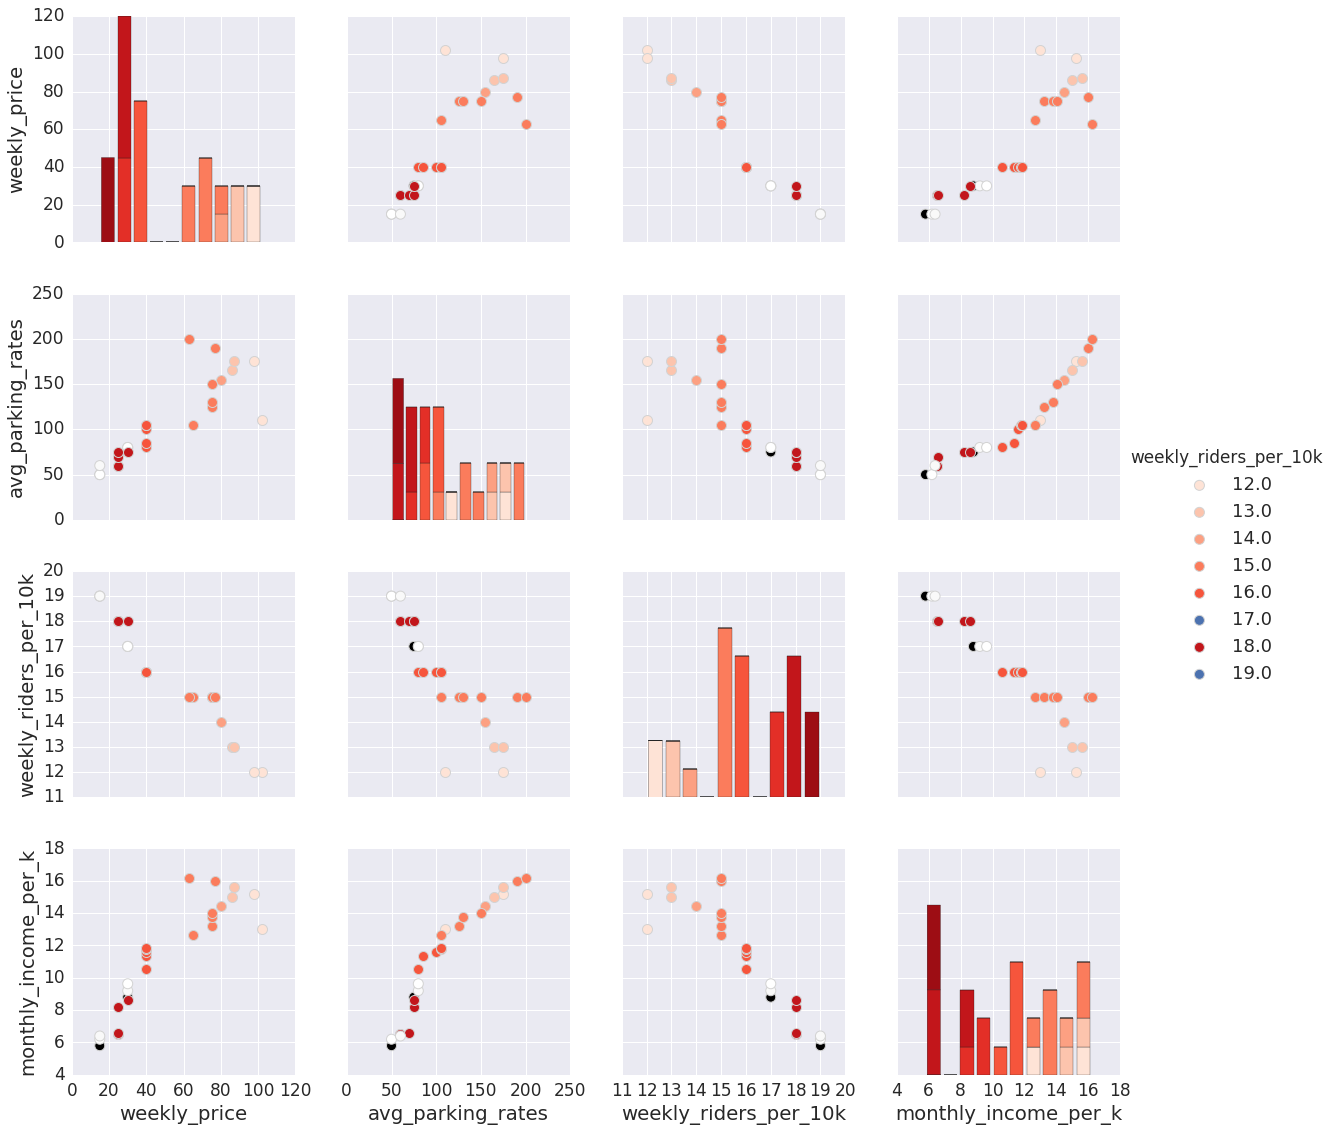

In [6]:
sns.pairplot(transit_graph, size=4, palette='Reds', hue="weekly_riders_per_10k", plot_kws=dict(s=100, edgecolor="lightgrey", linewidth=1));

### Analysis

We can see from the graph that there appears to be a strong linear relationship between the weekly_price and weekly_riders_per_10k. As the weekly price to ride increases, the number of riders decreases. We can try plotting a regression line using Seaborn, but unfortunately we don't get much data from this.

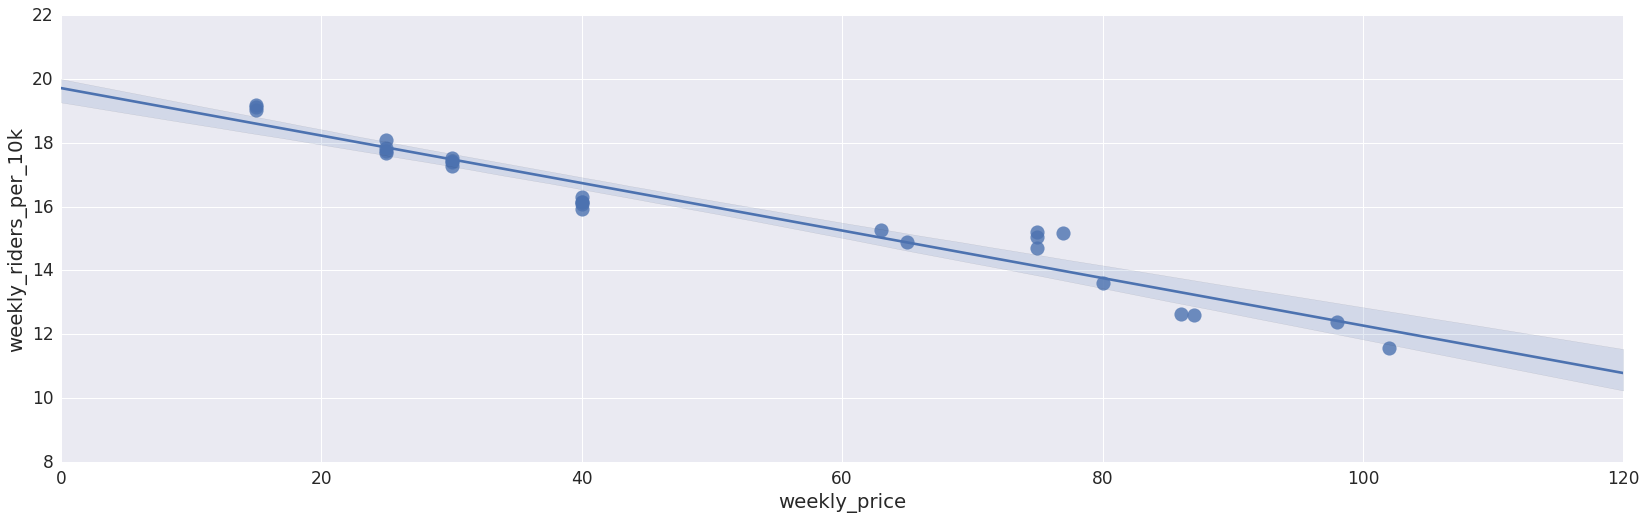

In [14]:
sns.regplot(x="weekly_price", y="weekly_riders_per_10k", data=transit_norm, scatter_kws={"s": 200});

Now, let's use scikit-learn's `LinearRegression` to attempt a prediction using all of our features. Before we do a prediction, remember that we need to split our data into a training set and a test set.

In [15]:
from sklearn.cross_validation import train_test_split

transit_train, transit_test = train_test_split(transit_norm)
grid(transit_train.head())
grid(transit_test.head())

We can see that we have a random and mutually exclusive sample of the data for training and testing.

The next step is we need to split our training and testing data into X (features) and y (targets) and run our linear regressor! We will run the train and test split first so that we can see how it changes with each run. We will also instruct our linear regressor to normalize the data as this will allow us to more easily compare our coefficients.

In [18]:
transit_train, transit_test = train_test_split(transit_norm)

X_train = transit_train.drop(['weekly_riders_per_10k'], axis=1)
X_test = transit_test.drop(['weekly_riders_per_10k'], axis=1)

y_train = transit_train[['weekly_riders_per_10k']]
y_test = transit_test[['weekly_riders_per_10k']]

regr = lin_reg(X_train, y_train, X_test, y_test, graph=False, normalize=True)

ordered_cols = [(X_train.columns[i], regr.coef_[0][i])
                for i in np.abs(regr.coef_[0]).argsort()[::-1]]
print('Features ordered by coefficients:', ordered_cols)

Mean Squared Error: 0.49
Root Mean Squared Error: 0.7
Variance Score: 0.85
Coefficients: [[-0.07111865  0.01029138 -0.03195735  0.71237059]]
Features ordered by coefficients: [('city_pop_per_100k', 0.71237058809899556), ('weekly_price', -0.071118649291726246), ('monthly_income_per_k', -0.031957353853603307), ('avg_parking_rates', 0.010291381476878171)]


### Analysis

When this is run a few times you should make a few observations:

**The MSE and variance score fluctuates pretty significantly**

Sometimes the score is as low as 0.76 and sometimes as high as 0.96! This variance could indicate that we don't have enough samples in order to make a very accurate prediction.

**The absolute value order of the coefficients is fairly static**

This may indicate that these features reliably affect the regression in a similar way regardless of the sample chosen. This is good because it means that our model may work well against additional, unseen samples in the future. Other points to note about the correlations:
- `city_pop_per_100k` is generally the largest and is positively correlated. This indicates that as a city's population grows the inhabitants are more likely to ride mass transit.
- `monthly_income_per_k` is the next largest, but is negatively correlated. This indicates as the wealth of a city's inhabitants increases, people are less likely to ride.
- `weekly_price` is negatively correlated, but somewhat weakly. As the price to ride rises, people are somewhat less inclined to ride.
- `avg_parking_rates` is positively correlated, but very weak. As the price of parking rates rise, people are slightly more inclined to take mass transit.

Let's perform one more experiment with this dataset. This time we will try dropping features from least to most important according to the coefficient values and see how this affects the score.

In [19]:
transit_train, transit_test = train_test_split(transit_norm)

y_train = transit_train[['weekly_riders_per_10k']]
y_test = transit_test[['weekly_riders_per_10k']]

X_train_all = transit_train.drop(['weekly_riders_per_10k'], axis=1)
X_test_all = transit_test.drop(['weekly_riders_per_10k'], axis=1)
print("All features")
regr = lin_reg(X_train_all, y_train, X_test_all, y_test, graph=False, normalize=True)

X_train_best_3 = X_train_all.drop(['avg_parking_rates'], axis=1)
X_test_best_3 = X_test_all.drop(['avg_parking_rates'], axis=1)
print("\nFeatures:", X_train_best_3.columns.values)
regr = lin_reg(X_train_best_3, y_train, X_test_best_3, y_test, graph=False, normalize=True)

X_train_best_2 = X_train_best_3.drop(['monthly_income_per_k'], axis=1)
X_test_best_2 = X_test_best_3.drop(['monthly_income_per_k'], axis=1)
print("\nFeatures:", X_train_best_2.columns.values)
regr = lin_reg(X_train_best_2, y_train, X_test_best_2, y_test, graph=False, normalize=True)

X_train_best_1 = X_train_best_2.drop(['weekly_price'], axis=1)
X_test_best_1 = X_test_best_2.drop(['weekly_price'], axis=1)
print("\nFeatures:", X_train_best_1.columns.values)
regr = lin_reg(X_train_best_1, y_train, X_test_best_1, y_test, graph=False, normalize=True)

All features
Mean Squared Error: 0.4
Root Mean Squared Error: 0.64
Variance Score: 0.95
Coefficients: [[-0.06801906  0.01723858 -0.22809835 -0.06563305]]

Features: ['weekly_price' 'monthly_income_per_k' 'city_pop_per_100k']
Mean Squared Error: 0.47
Root Mean Squared Error: 0.69
Variance Score: 0.94
Coefficients: [[-0.07109854 -0.02356135 -0.28444026]]

Features: ['weekly_price' 'city_pop_per_100k']
Mean Squared Error: 0.45
Root Mean Squared Error: 0.67
Variance Score: 0.94
Coefficients: [[-0.07113569 -0.16342998]]

Features: ['city_pop_per_100k']
Mean Squared Error: 0.64
Root Mean Squared Error: 0.8
Variance Score: 0.92
Coefficients: [[ 2.52872552]]


In [25]:
pd.DataFrame(np.corrcoef(X_train)).iplot(kind='heatmap', colorscale='purples')